<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run date time (IST): 2025-02-11 13:12:54
-------------------
qualified stocks: 88
with latest results: 82
still star stocks: 45
-------------------
Initial Investment:  1.07 C
CY Investment:  1.20 C
Reserve:  2.48 L
Current:  1.12 C
-------------------
Today PnL: -3.05 L (-2.64%)
Current PnL: -21.12 L (-17.65%)
CY Booked + Current PnL: -7.25 L (-6.06%)
-------------------
Total profit:  1.72 L
Total loss:  -22.84 L
-------------------
Total Booked + Current PnL: 5.86 L (5.5%)
Total Booked PnL: 26.98 L (25.33%)
Curr Year Booked PnL: 13.87 L (12.33%)
Prev Year Booked PnL: 13.11 L (12.31%)
Est FTT:  1.88 C
Est FTT PnL: 75.49 L (67.12%)
-------------------
Est LTT:  2.48 C
Est LTT PnL: 1.36 C (120.49%)
Deployed:  1.07 C
Current:  1.12 C
CAGR/XIRR %: 4.37%


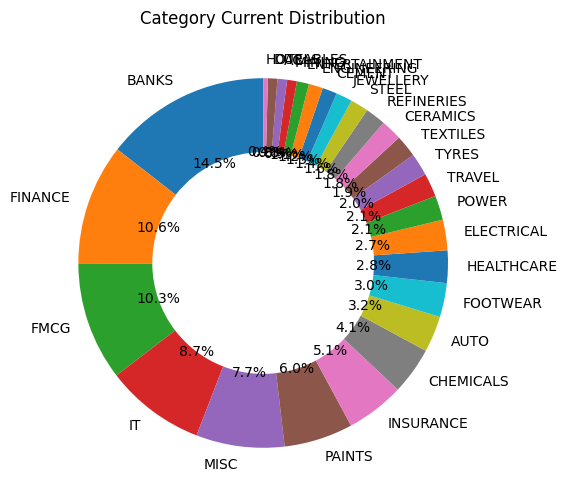

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Conviction', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'RRR Ind', 'CurrAlloc%', 'Gained%', 'Criteria', 'Strategy', 'CapType', 'Category']
df_portfolio_features = df_portfolio_features[cols]

In [4]:
# all portfolio
df_portfolio_features = df_portfolio_features.sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(df_portfolio_features, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
53,NMDC,65.62,82.00,-53.49,M-MC,80.68,93896.0,-6503.0,31568.0,-4.29,...,33.62,24.96,507.0,-0.21,0.85,2.28,XY25,NTT,MC,MINING
11,AXISBANK,986.10,1317.30,-29.84,H-LC,45.45,102607.0,2025.0,31757.0,-0.57,...,30.95,33.59,NaN,0.06,0.93,6.10,X40,ATH,LC,BANKS
32,HAVELLS,1588.50,2077.12,-2.15,X-LC,70.45,97234.0,-2842.0,33624.0,-3.41,...,34.58,30.76,NaN,-0.08,0.88,16.45,X40,ATH,LC,ELECTRICAL
35,HINDUNILVR,2430.78,2723.00,-16.13,X-LC,42.05,194796.0,-9390.0,33933.0,-1.80,...,17.42,12.02,-3.0,-0.28,1.77,7.53,XY25,NTT,LC,FMCG
72,SIS,477.00,528.00,53.85,M-SC,53.41,55514.0,-25576.0,34247.0,-3.09,...,61.69,10.69,-28.0,-0.75,0.50,7.01,X40N,NTT,SC,MISC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,REPCOHOME,527.76,880.00,-21.51,H-SC,28.41,134611.0,-60132.0,190111.0,-6.52,...,141.23,66.74,-44.0,-0.32,1.22,0.11,XY24,NTT,SC,FINANCE
62,SAIL,130.64,228.00,35.91,M-MC,72.73,174129.0,-50833.0,218480.0,-3.86,...,125.47,74.53,-18.0,-0.23,1.58,1.03,XY24,BTT,MC,STEEL
57,RBLBANK,230.61,388.00,-39.52,M-SC,97.73,166827.0,-67473.0,227385.0,-2.40,...,136.30,68.25,-48.0,-0.30,1.52,9.86,XY24,NTT,SC,BANKS
12,BANDHANBNK,217.54,400.00,-48.70,H-SC,87.50,157968.0,-80673.0,280836.0,-3.30,...,177.78,83.87,-29.0,-0.29,1.44,4.60,XY24,NTT,SC,BANKS


In [5]:
# Xceptional allocation
tmp_df = df_portfolio_features[df_portfolio_features['Conviction'].str.startswith('X-', na=False)]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
32,HAVELLS,1588.50,2077.12,-2.15,X-LC,70.45,97234.0,-2842.0,33624.0,-3.41,...,34.58,30.76,NaN,-0.08,0.88,16.45,X40,ATH,LC,ELECTRICAL
35,HINDUNILVR,2430.78,2723.00,-16.13,X-LC,42.05,194796.0,-9390.0,33933.0,-1.80,...,17.42,12.02,-3.0,-0.28,1.77,7.53,XY25,NTT,LC,FMCG
77,TATAELXSI,7332.28,9000.00,-20.85,X-MC,85.23,86520.0,-16132.0,39479.0,-3.10,...,45.63,22.74,-10.0,-0.41,0.79,4.01,X40N,NTT,MC,IT
79,TCS,4164.02,4998.00,-2.16,X-LC,31.82,154859.0,-7538.0,40062.0,-1.64,...,25.87,20.03,8.0,-0.19,1.41,8.94,X40,BTT,LC,IT
20,CERA,9059.90,10420.45,-17.92,X-SC,43.18,63530.0,-27069.0,40672.0,-3.61,...,64.02,15.02,-57.0,-0.67,0.58,2.80,X40N,ATH,SC,CERAMICS
39,INFY,1436.24,2275.00,4.82,X-LC,44.32,194875.0,45506.0,41723.0,-0.35,...,21.41,58.40,33.0,1.09,1.77,36.20,X40,BTT,LC,IT
54,PIDILITIND,2482.94,3576.00,-16.79,X-LC,73.86,164233.0,20222.0,43177.0,-1.27,...,26.29,44.02,10.0,0.47,1.49,7.25,X40,BTT,LC,CHEMICALS
59,RELIANCE,1288.53,1526.00,-6.51,X-LC,67.05,195620.0,-7968.0,45482.0,-1.24,...,23.25,18.43,67.0,-0.18,1.78,2.72,XY25,NTT,LC,REFINERIES
71,SIEMENS,6028.45,7969.85,-13.63,X-LC,14.77,87659.0,-14825.0,47827.0,-3.60,...,54.56,32.20,NaN,-0.31,0.80,22.49,AR,ATH,LC,ELECTRICAL
46,LTIM,5664.39,7262.39,7.37,X-LC,35.23,169756.0,-176.0,48109.0,-2.40,...,28.34,28.21,7.0,-0.00,1.54,24.70,X200,ATH,LC,IT


In [6]:
# XSP allocation
tmp_df = df_portfolio_features[(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
53,NMDC,65.62,82.0,-53.49,M-MC,80.68,93896.0,-6503.0,31568.0,-4.29,...,33.62,24.96,507.0,-0.21,0.85,2.28,XY25,NTT,MC,MINING
35,HINDUNILVR,2430.78,2723.0,-16.13,X-LC,42.05,194796.0,-9390.0,33933.0,-1.80,...,17.42,12.02,-3.0,-0.28,1.77,7.53,XY25,NTT,LC,FMCG
68,SBIN,760.30,863.0,-20.52,M-LC,68.18,193264.0,-8216.0,35425.0,-1.02,...,18.33,13.51,93.0,-0.23,1.76,4.75,XY25,NTT,LC,BANKS
59,RELIANCE,1288.53,1526.0,-6.51,X-LC,67.05,195620.0,-7968.0,45482.0,-1.24,...,23.25,18.43,67.0,-0.18,1.78,2.72,XY25,NTT,LC,REFINERIES
51,NESTLEIND,2225.87,2755.0,-20.17,X-LC,60.23,199017.0,-3537.0,51685.0,-1.53,...,25.97,23.77,NaN,-0.07,1.81,2.38,XY25,NTT,LC,FMCG
23,DABUR,518.36,735.0,-7.93,X-MC,77.27,132090.0,-92.0,55333.0,-1.91,...,41.89,41.79,1.0,-0.00,1.20,5.60,XY24,BTT,MC,FMCG
49,MEDANTA,1022.60,1486.0,-0.15,X-SC,94.32,169176.0,13741.0,56691.0,-1.62,...,33.51,45.32,8.0,0.24,1.54,15.11,XY24,NTT,SC,HEALTHCARE
84,UNIONBANK,123.87,163.0,-17.66,M-MC,95.45,126059.0,-14781.0,59273.0,-3.47,...,47.02,31.59,-39.0,-0.25,1.15,9.50,XY24,NTT,MC,BANKS
4,ADANIPORTS,1103.69,1583.0,-10.58,M-LC,89.77,153152.0,1946.0,63711.0,-2.30,...,41.60,43.43,NaN,0.03,1.39,4.80,XY24,NTT,LC,MISC
15,BERGEPAINT,558.54,680.0,-34.06,H-MC,90.91,150274.0,-26783.0,65279.0,-2.22,...,43.44,21.75,-14.0,-0.41,1.37,7.49,XY24,NTT,MC,PAINTS


In [7]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
67,SBILIFE,1483.67,1928.65,-12.74,H-LC,48.86,95948.0,-4942.0,35203.0,-2.57,...,36.69,29.99,NaN,-0.14,0.87,5.39,AR,ATH,LC,INSURANCE
38,INDUSINDBK,1354.50,1800.00,-29.71,H-MC,100.00,60232.0,-16974.0,42367.0,-1.06,...,70.34,32.89,-21.0,-0.40,0.55,14.06,XR,NTT,MC,BANKS
48,MASFIN,326.60,399.50,-34.36,H-SC,61.36,73050.0,-24930.0,46803.0,-3.32,...,64.07,22.32,-74.0,-0.53,0.66,1.73,XR,ATH,SC,FINANCE
81,TRIDENT,37.35,48.00,47.22,M-SC,56.82,71284.0,-20970.0,47276.0,-2.80,...,66.32,28.51,-16.0,-0.44,0.65,0.00,XR,NTT,SC,TEXTILES
71,SIEMENS,6028.45,7969.85,-13.63,X-LC,14.77,87659.0,-14825.0,47827.0,-3.60,...,54.56,32.20,NaN,-0.31,0.80,22.49,AR,ATH,LC,ELECTRICAL
19,CAMS,3643.00,5250.99,-7.96,M-SC,1.14,94584.0,-7420.0,52447.0,-4.22,...,55.45,44.14,261.0,-0.14,0.86,24.79,XR,ATH,SC,MISC
45,LAOPALA,369.40,464.00,-32.67,M-SC,7.95,69301.0,-31545.0,57374.0,-3.53,...,82.79,25.61,-50.0,-0.55,0.63,0.00,AR,NTT,SC,CERAMICS
17,BSOFT,628.85,844.81,-12.49,M-SC,46.59,88252.0,-21797.0,59588.0,-4.20,...,67.52,34.34,-28.0,-0.37,0.80,0.00,XR,ATH,SC,IT
24,DEN,52.79,75.00,-34.47,L-SC,38.64,57600.0,-26864.0,62398.0,-4.89,...,108.33,42.07,-21.0,-0.43,0.52,0.00,AR,NTT,SC,ENTERTAINMENT
16,BRITANNIA,4905.19,6446.05,-0.58,X-LC,62.50,194706.0,-1502.0,63143.0,-0.86,...,32.43,31.41,239.0,-0.02,1.77,5.63,AR,ATH,LC,FMCG


In [8]:
# Top N allocation
df_tmp = df_portfolio_features.sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,19.61
1,20,35.39
2,30,49.20


In [9]:
# criteria-wise allocation
df_portfolio_features.groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,41.46
X40,14.73
X40N,12.42
AR,10.67
XR,9.79
XY25,7.97
X200,1.54
SR,1.37


In [10]:
# conviction-wise allocation
df_portfolio_features.groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
M-SC,23.82
X-LC,21.21
H-SC,16.41
M-MC,8.71
H-MC,6.18
X-MC,6.10
M-LC,5.47
X-SC,4.62
H-LC,3.28


In [11]:
# criteria-conviction-wise allocation
df_portfolio_features.groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      M-SC          12.90
X40       X-LC          10.17
XY24      H-SC           7.56
          M-MC           6.23
X40N      H-SC           5.65
XY24      H-MC           5.63
XY25      X-LC           5.36
XR        M-SC           4.37
AR        X-LC           4.14
XY24      M-LC           3.71
X40N      M-SC           3.59
X40       H-LC           2.41
XR        H-SC           2.12
AR        X-MC           1.97
X40N      X-MC           1.78
XY25      M-LC           1.76
XY24      X-SC           1.54
X200      X-LC           1.54
X40N      X-SC           1.40
AR        M-SC           1.27
XY24      X-MC           1.20
X40       X-MC           1.15
AR        H-SC           1.08
XR        X-SC           1.00
X40       M-SC           1.00
XY24      L-SC           0.98
XR        L-SC           0.94
AR        H-LC           0.87
XY25      M-MC           0.85
AR        M-MC           0.82
XR        M-MC           0.81
SR        M-SC           0.69
          X-SC           0.68
XR        H-MC           0.55
AR        L-SC           0.52
Name: CurrAlloc%, dtype: float64

In [12]:
# sector-wise stats
df_tmp = df_portfolio_features.groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
BANKS,14.47,-16.45,69.90
FINANCE,10.60,-24.29,75.38
FMCG,10.33,-7.12,39.59
IT,8.72,-15.99,73.78
MISC,7.72,-18.87,60.15
PAINTS,6.03,-24.11,60.84
INSURANCE,5.11,-4.10,55.95
CHEMICALS,4.13,-18.99,97.41
AUTO,3.16,-18.49,70.58


In [13]:
# bucketX stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,76.54,8422792.0,-13.44,-1131972.0,57.74,4863706.0


In [14]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,3311867.0
XR,1159793.0
X40N,1099765.0
AR,909139.0
X40,627752.0
XY25,198093.0
SR,194437.0
X200,48109.0


In [15]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
M-SC,2182308.0
H-SC,1926697.0
M-MC,769719.0
X-LC,752339.0
X-SC,394614.0
H-MC,377080.0
L-SC,328850.0
X-MC,309329.0
M-LC,253129.0


In [16]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      M-SC          1068233.0
          H-SC           800887.0
          M-MC           573277.0
X40N      H-SC           511980.0
XR        M-SC           453010.0
X40       X-LC           394525.0
X40N      M-SC           381264.0
XY24      H-MC           334713.0
AR        H-SC           320187.0
XR        H-SC           293643.0
XY24      M-LC           217704.0
AR        X-LC           178605.0
XR        L-SC           175725.0
AR        M-SC           143213.0
XY25      X-LC           131100.0
SR        X-SC           121425.0
XR        X-SC           115923.0
X40N      X-MC           105946.0
X40       H-LC           105385.0
X40N      X-SC           100575.0
XY24      L-SC            90727.0
AR        M-MC            85749.0
          X-MC            83784.0
XR        M-MC            79125.0
SR        M-SC            73012.0
X40       X-MC            64266.0
          M-SC            63576.0
AR        L-SC            62398.0
XY24      X-SC            56691.0
          X-MC            55333.0
X200      X-LC            48109.0
XR        H-MC            42367.0
XY25      M-LC            35425.0
AR        H-LC            35203.0
XY25      M-MC            31568.0
Name: FTT Amt, dtype: float64

In [17]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
M-SC,25
H-SC,15
X-LC,13
M-MC,8
X-MC,5
X-SC,5
H-MC,5
M-LC,4
L-SC,4
